In [1]:
import numpy as nc 
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jjurc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###### Konstante

In [3]:

plt.rcParams['figure.figsize'] = [12, 2]
CHROMOSOME_LENGTHS = [247249719, 242951149, 199501827,
                      191273063, 180857866, 170899992,
                      158821424, 146274826, 140273252,
                      135374737, 134452384, 132349534,
                      114142980, 106368585, 100338915,
                      88827254, 78774742, 76117153, 
                      63811651, 62435964, 46944323, 
                      49691432, 154913754, 57772954]

In [4]:
Event_read = open("asta.gtf")
event_type_array = []
read_type_array = []
chromosomearray = []
for row in Event_read:
    arr = word_tokenize(row)
    chromosomearray.append([arr[0]] + arr[3:5])
    for elements, index in zip(arr, range(len(arr))) :
        if elements == "structure":
            event_type_array.append(arr[index+2])
        


[]


In [45]:
Mapped_read = open("Mapped/Mapped17.txt")
mapped_array = []
for row in Mapped_read:
    arr = word_tokenize(row)
    mapped_array.append(int(arr[1]))

In [22]:
event_names = []
event_frequency = [0,0,0,]
for structure_type in event_type_array:
    if structure_type == "1^,2^": 
        event_frequency[0] += 1
    elif structure_type == "1-,2-": 
        event_frequency[1] += 1
    elif structure_type == "0,1-2^" or structure_type == "1-2^,0":
        event_frequency[2] += 1

print(event_frequency)
event_names = ["Donor", "Accept", "Exon"]

[10627, 13970, 38739]


In [23]:
chromosome_names = []
for i in range(0,22):
    chromosome_names.append("chr" + str(i+1))
    
chromosome_names.append("chrX")
chromosome_names.append("chrY")

In [24]:
chromosome3D = []
for name in chromosome_names:
    temp_array = []
    for i in range(len(chromosomearray)):
        if chromosomearray[i][0] == name:
            event_instance = chromosomearray[i]
            temp_array.append(event_instance[1:3])
    chromosome3D.append(temp_array)


In [46]:
chr_id = 17
histogram_precision = 250

(0.0, 78774742.0)

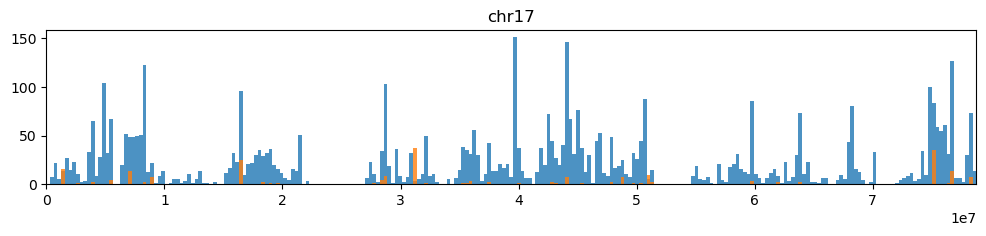

In [47]:
histdata = []
for events in chromosome3D[chr_id - 1]:
    histdata.append(int(events[0]))
    
ys =[]
for i in range(histogram_precision + 1):
    ys.append(CHROMOSOME_LENGTHS[chr_id - 1] /
              (histogram_precision + 1)* (i + 1))

plt.hist(histdata,ys,alpha = 0.8, label = "event")
plt.hist(mapped_array,ys, alpha = 0.8, label = "read")
plt.title(chromosome_names[chr_id-1] + "")
plt.xlim(xmin=0, xmax =CHROMOSOME_LENGTHS[chr_id - 1])
#plt.legend(loc='upper right', fontsize = 8)

<BarContainer object of 3 artists>

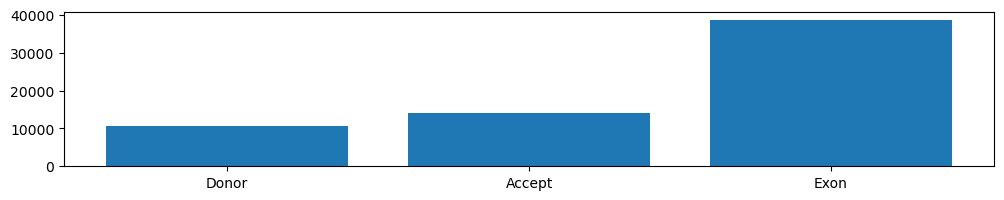

In [28]:
plt.bar(event_names, event_frequency)